In [1]:
# Importation des bibliothèques nécessaires
import pandas as pd            # Pandas pour la manipulation de données en tableau
import numpy as np             # NumPy pour les opérations numériques
import seaborn as sns          # Seaborn pour la visualisation de données
import PIL                     # PIL  pour le traitement d'images
import warnings                # Bibliothèque pour gérer les avertissements

from sklearn.model_selection import train_test_split  # Scikit-learn pour la division des données
from keras.utils import to_categorical                # Keras pour la conversion des étiquettes en catégories
from keras.models import Sequential                  # Keras pour la création de modèles séquentiels
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D  # Keras pour les différentes couches du réseau de neurones
from keras.optimizers import RMSprop                # Keras pour l'optimiseur RMSprop
from PIL import Image        # PIL pour le traitement d'images
import matplotlib.pyplot as plt


# Filtrer les avertissements pour une présentation plus propre
warnings.filterwarnings('ignore')


**Import data ******

In [2]:
# Obtention de nos dataframes à partir des fichiers CSV

train=pd.read_csv('/kaggle/input/agriculture-crop-images/Crop_details.csv')
test=pd.read_csv('/kaggle/input/testssss/testdata.csv')

In [3]:
# Obtention de nos variables X_train et y_train à partir des données d'entraînement
Y_train = train['croplabel']                  # Extraction des étiquettes (y_train)
X_train = train.drop(labels=['croplabel'], axis=1)  # Extraction des caractéristiques (X_train)



**Data Visualization**

In [4]:

# Affichage des valeurs uniques dans la colonne 'crop' sous forme de liste
crop_values = train['crop'].unique()
print("Types de cultures existants :")
print(list(crop_values))





Types de cultures existants :
['sugarcane', 'wheat', 'jute', 'maize', 'rice']


In [5]:
print(train.columns)



Index(['Unnamed: 0', 'path', 'crop', 'croplabel'], dtype='object')


croplabel
4    203
3    199
0    199
1    199
2    199
Name: count, dtype: int64

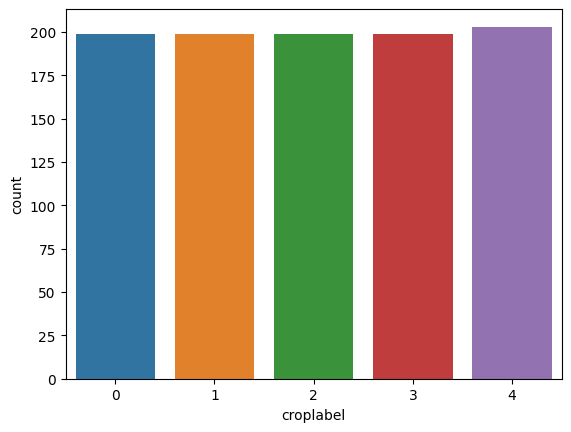

In [6]:
# Séparation de la variable cible (croplabel) et des caractéristiques
Y_train = train['croplabel']
X_train = train.drop(labels=['croplabel'], axis=1)

# Visualisation de la distribution des classes dans la variable cible
g = sns.countplot(x=Y_train)
Y_train.value_counts()



In [7]:
len(train)




999

**Null values**

In [8]:
# Vérification des valeurs nulles dans X_train
print("Valeurs nulles dans X_train :")
print(X_train.isnull().any())

# Vérification des valeurs nulles dans Y_train
print("\nValeurs nulles dans Y_train :")
print(Y_train.isnull().any())



Valeurs nulles dans X_train :
Unnamed: 0    False
path          False
crop          False
dtype: bool

Valeurs nulles dans Y_train :
False


**Split train dataset ******

In [9]:
from sklearn.model_selection import train_test_split

# Diviser l'ensemble d'entraînement en ensembles d'entraînement et de validation
X_train, X_validation, Y_train, Y_validation = train_test_split(X_train, Y_train, test_size=0.2, random_state=42)

# Afficher les dimensions des ensembles résultants
print("Dimensions de l'ensemble d'entraînement :", X_train.shape)
print("Dimensions de l'ensemble de validation :", X_validation.shape)


Dimensions de l'ensemble d'entraînement : (799, 3)
Dimensions de l'ensemble de validation : (200, 3)


In [10]:
# Suppression des colonnes non nécessaires dans X_train
X_train = X_train.drop(columns=['crop', 'Unnamed: 0'])


In [11]:
# Suppression des colonnes non nécessaires dans X_validation
X_validation = X_validation.drop(columns=['crop', 'Unnamed: 0'])


**Image Processing**

In [12]:

# Définition de la fonction pour extraire les données RGB d'une image de culture et les remodeler en 28x28x3
def path_to_RGB(path: str):
    # Remplacement de la partie '/input' du chemin par '/input/agriculture-crop-images'
    path = path.replace('/input', '/input/agriculture-crop-images')
    
    # Ouverture de l'image à partir du chemin spécifié
    img = Image.open(path)
    
    # Redimensionnement de l'image à la taille souhaitée (28x28)
    img = img.resize((28, 28))
    
    # Conversion de l'image en tableau NumPy
    img_arr = np.array(img)
    
    # Remodelage du tableau pour avoir les dimensions 28x28x3
    img_arr = img_arr.reshape(28, 28, 3)
    
    return img_arr

# Définition de la fonction pour extraire les données RGB d'une image de test et les remodeler en 28x28x3
def path_to_RGB_test(path: str):
    # Ouverture de l'image à partir du chemin spécifié
    img = Image.open(path)
    
    # Redimensionnement de l'image à la taille souhaitée (28x28)
    img = img.resize((28, 28))
    
    # Conversion de l'image en tableau NumPy
    img_arr = np.array(img)
    
    # Remodelage du tableau pour avoir les dimensions 28x28x3
    img_arr = img_arr.reshape(28, 28, 3)
    
    return img_arr


**Normalization**

In [13]:
# Appel des fonctions de traitement d'image sur les chemins des images dans X_train
X_train['path'] = X_train['path'].apply(path_to_RGB)

# Normalisation des valeurs des pixels en divisant par 255
X_train['path'] = X_train['path'] / 255

# Appel des fonctions de traitement d'image sur les chemins des images dans X_validation
X_validation['path'] = X_validation['path'].apply(path_to_RGB)

# Normalisation des valeurs des pixels en divisant par 255
X_validation['path'] = X_validation['path'] / 255

# Appel des fonctions de traitement d'image sur les chemins des images dans test
test['testpath'] = test['testpath'].apply(path_to_RGB_test)

# Normalisation des valeurs des pixels en divisant par 255
test['testpath'] = test['testpath'] / 255


**Image Data Shape Inspection**

In [14]:
# Obtenir shape de la colonne 'path' dans X_train
X_train['path'].shape


(799,)

In [15]:
# Obtenir shape de la colonne 'path' dans X_validation
X_validation['path'].shape

(200,)

**Flatten Image Data**

In [16]:

# Flatten Image Data for Training Set
X_train_flattened = np.array(X_train['path'].tolist()).reshape(-1, 28*28*3)

# Flatten Image Data for Validation Set
X_validation_flattened = np.array(X_validation['path'].tolist()).reshape(-1, 28*28*3)


**Data Preparation**

In [17]:
# Redimensionnement des données d'image pour l'ensemble d'entraînement
X_train_resized = np.asarray(X_train_flattened).reshape(-1, 28, 28, 3)

# Encodage one-hot des étiquettes pour l'ensemble d'entraînement
Y_train_encoded = Y_train
Y_train_encoded = to_categorical(Y_train_encoded, num_classes=5)


In [18]:
# Redimensionnement des données d'image pour l'ensemble de validation
X_validation_resized = np.asarray(X_validation_flattened).reshape(-1, 28, 28, 3)

# Encodage one-hot des étiquettes pour l'ensemble de validation
Y_validation_encoded = Y_validation
Y_validation_encoded = to_categorical(Y_validation_encoded, num_classes=5)


**Building Model CNN**

In [19]:
# Définition du modèle CNN
model = Sequential()

# Première couche de convolution avec activation ReLU et entrée de forme (28, 28, 3)
model.add(Conv2D(filters=32, kernel_size=(5, 5), padding='Same', activation='relu', input_shape=(28, 28, 3)))

# Deuxième couche de convolution avec activation ReLU
model.add(Conv2D(filters=32, kernel_size=(5, 5), padding='Same', activation='relu'))

# Couche de max pooling
model.add(MaxPool2D(pool_size=(2, 2)))

# Couche de dropout pour la régularisation
model.add(Dropout(0.25))

# Troisième couche de convolution avec activation ReLU
model.add(Conv2D(filters=64, kernel_size=(3, 3), padding='Same', activation='relu'))

# Quatrième couche de convolution avec activation ReLU
model.add(Conv2D(filters=64, kernel_size=(3, 3), padding='Same', activation='relu'))

# Deuxième couche de max pooling
model.add(MaxPool2D(pool_size=(2, 2), strides=(2, 2)))

# Deuxième couche de dropout
model.add(Dropout(0.25))

# Aplatir les données pour les passer à travers des couches entièrement connectées
model.add(Flatten())

# Première couche dense avec activation ReLU
model.add(Dense(256, activation="relu"))

# Troisième couche de dropout
model.add(Dropout(0.5))

# Couche de sortie avec activation softmax pour la classification
model.add(Dense(5, activation="softmax"))


In [20]:
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        2432      
                                                                 
 conv2d_1 (Conv2D)           (None, 28, 28, 32)        25632     
                                                                 
 max_pooling2d (MaxPooling2  (None, 14, 14, 32)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 14, 14, 32)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 14, 14, 64)        36928     
                                                        

**Set the optimizer and compile model**

In [21]:
# Définition de l'optimiseur RMSprop avec certains paramètres
optimizer = RMSprop(learning_rate=0.001, rho=0.9, epsilon=1e-08)
#un taux d'apprentissage de 0.001, un coefficient de décroissance exponentielle (rho) de 0.9, et une petite valeur epsilon pour la stabilité numérique.

# Compilation du modèle en spécifiant l'optimiseur, la fonction de perte et les métriques
model.compile(optimizer=optimizer, loss="categorical_crossentropy", metrics=["accuracy"])




**Model Training and Validation**

In [22]:
# Entraînement du modèle avec les données d'entraînement et de validation
history = model.fit(
    X_train_resized, Y_train_encoded,  # Données d'entraînement et étiquettes
    epochs=30,                         # Nombre d'époques d'entraînement
    batch_size=32,                     # Taille du lot d'entraînement
    validation_data=(X_validation_resized, Y_validation_encoded)  # Données de validation
)


Epoch 1/30
25/25 [==============================] - 4s 102ms/step - loss: 1.6346 - accuracy: 0.2403 - val_loss: 1.6049 - val_accuracy: 0.3100
Epoch 2/30
25/25 [==============================] - 2s 91ms/step - loss: 1.5794 - accuracy: 0.2628 - val_loss: 1.4983 - val_accuracy: 0.4100
Epoch 3/30
25/25 [==============================] - 2s 88ms/step - loss: 1.5111 - accuracy: 0.3730 - val_loss: 1.4802 - val_accuracy: 0.3450
Epoch 4/30
25/25 [==============================] - 2s 87ms/step - loss: 1.4234 - accuracy: 0.4093 - val_loss: 1.3428 - val_accuracy: 0.4550
Epoch 5/30
25/25 [==============================] - 2s 88ms/step - loss: 1.3021 - accuracy: 0.4768 - val_loss: 1.1858 - val_accuracy: 0.5600
Epoch 6/30
25/25 [==============================] - 2s 82ms/step - loss: 1.2849 - accuracy: 0.4819 - val_loss: 1.1433 - val_accuracy: 0.5650
Epoch 7/30
25/25 [==============================] - 2s 84ms/step - loss: 1.1422 - accuracy: 0.5432 - val_loss: 1.2325 - val_accuracy: 0.5200
Epoch 8/30
2

**loss, accuracy**

In [23]:
# Obtenir les paramètres d'entraînement du modèle à partir de l'objet history
parametres_entrainement = history.params
print(parametres_entrainement)



{'verbose': 1, 'epochs': 30, 'steps': 25}


In [24]:
# Obtenir les clés disponibles dans l'historique de l'entraînement du modèle
cles_historique = history.history.keys()
print(cles_historique)


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


In [25]:
type(history.history['loss'])


list

In [26]:
len(history.history['loss'])


30

In [27]:
history.history['loss'][:5] # show loss for first 5 epochs


[1.6346392631530762,
 1.579392910003662,
 1.5110914707183838,
 1.4233733415603638,
 1.302057147026062]

In [28]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

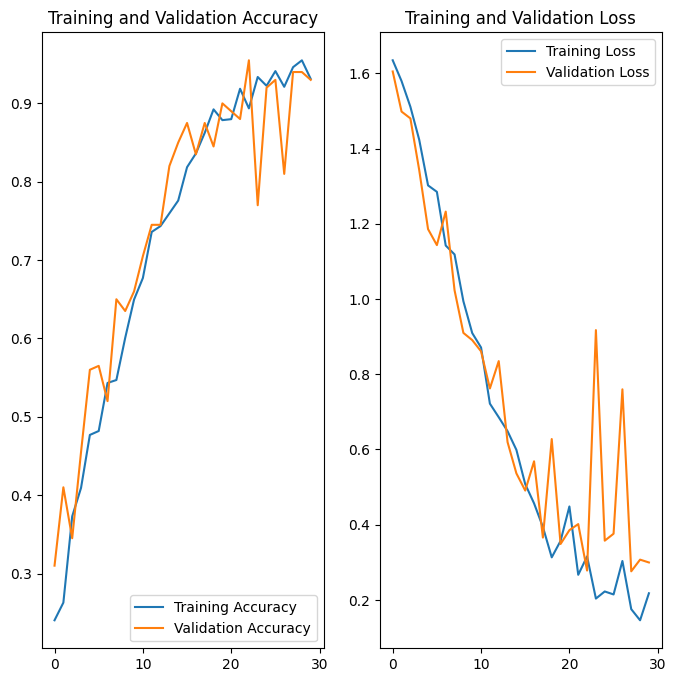

In [29]:
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(range(30), acc, label='Training Accuracy')
plt.plot(range(30), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(range(30), loss, label='Training Loss')
plt.plot(range(30), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [30]:
#Getting the desired things from the dataframe
X_test=test['testpath']
Y_test=test['croplabel']

In [31]:
X_test.shape


(51,)

In [32]:
#similar as done for the training data 
X_t=[]
for x in X_test:
    for j in x:
        for i in j:
            for a in i :
                X_t.append(a)

In [33]:
#resizing 
X_t=np.asarray(X_t).reshape(51,28,28,3)

In [34]:
Y_test=to_categorical(Y_test,num_classes=5)


**Evaluation**

In [35]:
#evaluating the model performance
model.evaluate(X_t,Y_test)

2/2 [==============================] - 0s 16ms/step - loss: 3.1203 - accuracy: 0.5490


[3.1203176975250244, 0.5490196347236633]

**Prediction**

In [36]:
# Supposons que votre jeu de données de test est stocké dans la variable 'test'
nombre_classes_test = test['croplabel'].nunique()

# Affichage du nombre de classes
print("Nombre de classes dans le jeu de données de test :", nombre_classes_test)


Nombre de classes dans le jeu de données de test : 5


**Prediction**

1/1 [==============================] - 0s 122ms/step


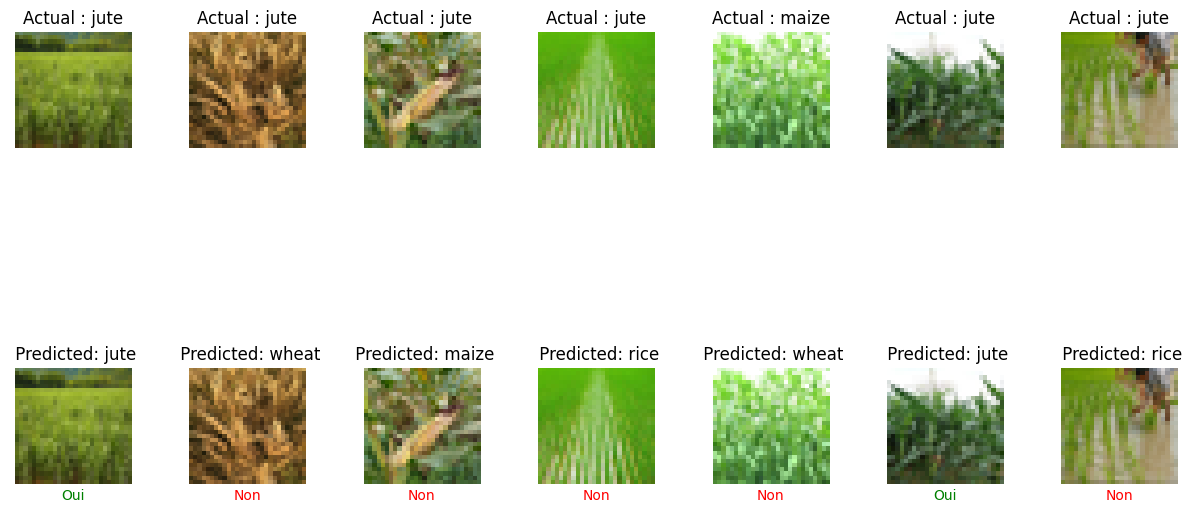

In [37]:
# Supposons que vous avez un dictionnaire de correspondance comme celui-ci
mapping_crops = {
    0: 'jute',
    1: 'maize',
    2: 'rice',
    3: 'sugarcane',
    4: 'wheat'
}

import random

# Sélectionner un nombre aléatoire d'images pour la prédiction
nombre_images_a_predire = 7  # Vous pouvez ajuster ce nombre selon vos besoins
indices_images = random.sample(range(len(X_t)), nombre_images_a_predire)

# Prédire les classes pour les images sélectionnées
predictions = model.predict(X_t[indices_images])

# Convertir les prédictions en classes prédites
classes_predites = np.argmax(predictions, axis=1)

# Afficher les images avec les cultures correctes et prédites
plt.figure(figsize=(15, 8))
plt.subplots_adjust(wspace=0.5)  # Réglage de l'espacement horizontal entre les sous-graphiques

for i, idx in enumerate(indices_images):
    # Image réelle
    plt.subplot(2, nombre_images_a_predire, i + 1)
    plt.imshow(X_t[idx])
    vraie_culture = mapping_crops[int(Y_test[idx][0])]  # Convertir Y_test[idx] en entier
    plt.title(f'Actual : {vraie_culture}')
    plt.axis('off')

    # Image prédite
    plt.subplot(2, nombre_images_a_predire, i + nombre_images_a_predire + 1)
    plt.imshow(X_t[idx])
    culture_predite = mapping_crops[classes_predites[i]]
    plt.title(f' Predicted: {culture_predite}')
    plt.axis('off')

    # Comparer les classes réelles avec les classes prédites
    if int(Y_test[idx][0]) == classes_predites[i]:
        plt.text(0.5, -0.1, 'Oui', ha='center', va='center', transform=plt.gca().transAxes, color='green')
    else:
        plt.text(0.5, -0.1, 'Non', ha='center', va='center', transform=plt.gca().transAxes, color='red')

plt.show()

